# Data Exploration

### Overdose / Opioid Data
From the [Georgia Dept of Public Health's Data Warehouse](https://oasis.state.ga.us/oasis/webquery/qryDrugOverdose.aspx)

NOTE: The data table was created by selecting all options possible

In [128]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
# plt.rcParams['figure.figsize'] = 11.7,8.27
# %matplotlib inline

In [292]:
# data file
csv_data = '../Data/overdose_opioid_data_edited.csv'

In [293]:
# create pandas dataframe (AKA df)
df = pd.read_csv(csv_data)

In [294]:
# first five rows of the data
# switch head for tail to get last five rows
df.head()

,Geography,Deaths_1999,Death_Rate_1999,Age_Adjusted_Death_Rate_1999,Pct_Deathsby_Cause_1999,Deaths_2000,Death_Rate_2000,Age_Adjusted_Death_Rate_2000,Pct_Deathsby_Cause_2000,Deaths_2001,...,Age_Adjusted_Death_Rate_2016,Pct_Deathsby_Cause_2016,Deaths_2017,Death_Rate_2017,Age_Adjusted_Death_Rate_2017,Pct_Deathsby_Cause_2017,Deaths_Selected_Years_Total,Death_Rate_Selected_Years_Total,Age_Adjusted_Death_Rate_Selected_Years_Total,Pct_Deathsby_Cause_Selected_Years_Total
0,Georgia,274,3.4,3.4,0.4,383,4.7,4.6,0.6,492,...,13.1,1.7,"1,529",14.7,14.6,1.8,"16,362",9.2,9.1,1.2
1,Appling,2,*,*,*,1,*,*,*,1,...,*,*,1,*,*,*,25,7.3,7.5,0.7
2,Atkinson,1,*,*,*,0,0,0,0,0,...,*,*,4,*,*,*,16,10.4,10.9,1.2
3,Bacon,0,0,0,0,0,0,0,0,1,...,0,0,1,*,*,*,21,10.2,10.8,0.9
4,Baker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,*,*,*


In [295]:
# transpose data table
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
Geography,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Rockdale,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary
Deaths_1999,274,2,1,0,0,0,0,0,0,0,...,1,1,1,0,0,3,2,1,3,274
Death_Rate_1999,3.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,3.4
Age_Adjusted_Death_Rate_1999,3.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,3.4
Pct_Deathsby_Cause_1999,0.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,0.4


In [296]:
# set first row as column headers
df.columns = df.iloc[0]
df.columns.rename(None, inplace=True)
df.head()

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Rockdale,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary
Geography,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Rockdale,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary
Deaths_1999,274,2,1,0,0,0,0,0,0,0,...,1,1,1,0,0,3,2,1,3,274
Death_Rate_1999,3.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,3.4
Age_Adjusted_Death_Rate_1999,3.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,3.4
Pct_Deathsby_Cause_1999,0.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,0.4


In [297]:
# drop first row
df = df.iloc[1:]
df.head()

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Rockdale,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary
Deaths_1999,274,2,1,0,0,0,0,0,0,0,...,1,1,1,0,0,3,2,1,3,274
Death_Rate_1999,3.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,3.4
Age_Adjusted_Death_Rate_1999,3.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,3.4
Pct_Deathsby_Cause_1999,0.4,*,*,0,0,0,0,0,0,0,...,*,*,*,0,0,*,*,*,*,0.4
Deaths_2000,383,1,0,0,0,3,1,1,0,0,...,7,2,1,1,2,2,0,0,3,383


In [298]:
# change all * vals to NaN
cols = df.columns
for col in cols:
    df.loc[df[col] == '*', col] = np.nan
    
# look at NaN counts for each column
df.isna().sum()

Georgia            0
Appling           45
Atkinson          30
Bacon             33
Baker              6
Banks             39
Ben_Hill          30
Berrien           33
Bleckley          27
Brantley          36
Brooks            27
Bryan             36
Burke             48
Butts             36
Calhoun           12
Candler           27
Charlton          27
Chattahoochee     24
Chattooga         33
Clay              12
Clinch            24
Cook              36
Crawford          45
Crisp             36
Dade              27
Dawson            30
Decatur           36
Dodge             42
Dooly             21
Early             18
                  ..
Floyd              3
Forsyth            3
Fulton             0
Glynn             18
Gordon            18
Gwinnett           0
Habersham         33
Hall               3
Henry              3
Houston            9
Jackson           12
Laurens           21
Liberty           33
Lowndes           21
Murray             9
Muscogee           3
Newton       

In [299]:
# shape of the dataframe (rows, columns)
df.shape

(80, 161)

In [300]:
df.isna().sum().sort_values()

Georgia            0
Richmond           0
Gwinnett           0
Fulton             0
DeKalb             0
Cobb               0
Clayton            0
Chatham            0
Bibb               0
County_Summary     0
Hall               3
Forsyth            3
Floyd              3
Muscogee           3
Paulding           3
Cherokee           3
Henry              3
Baker              6
Douglas            6
Randolph           6
Coweta             6
Bartow             6
Barrow             6
Taliaferro         6
Walton             6
Carroll            6
Treutlen           9
Terrell            9
Houston            9
Schley             9
                  ..
Jeff_Davis        39
Peach             39
Jones             39
Baldwin           39
Upson             39
Mitchell          39
Hart              39
Putnam            42
Toombs            42
Towns             42
Washington        42
Heard             42
Dodge             42
Jasper            42
Colquitt          42
Crawford          45
Lee          

In [301]:
# seaborn pairplot
# g = sns.pairplot(df)

In [302]:
df.head()

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Rockdale,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary
Deaths_1999,274,2,1,0,0,0,0,0,0,0,...,1,1,1,0,0,3,2,1,3,274
Death_Rate_1999,3.4,NaN,NaN,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,3.4
Age_Adjusted_Death_Rate_1999,3.4,NaN,NaN,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,3.4
Pct_Deathsby_Cause_1999,0.4,NaN,NaN,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.4
Deaths_2000,383,1,0,0,0,3,1,1,0,0,...,7,2,1,1,2,2,0,0,3,383


In [303]:
# currently the index is a category_year
# I want to drop the index into two columns of a category and year
# so I can see some aggregate data both by category and by year
def get_category(s):
    if '1' in s or '2' in s:
        s_list = s.split('_')
        category = s_list[0:-1]
        return '_'.join(category)
    else:
        return s
    

def get_year(s):
    if '1' in s or '2' in s:
        s_list = s.split('_')
        year = s_list[-1]
    else:
        s_list = s.split('_')
        year = np.nan
    return year

In [304]:
df['temp'] = df.index

In [305]:
df['Category'] = df.temp.apply(get_category)
df['Year'] = df.temp.apply(get_year)

# remove current index column
df.reset_index(inplace=True)

# drop temp column
df.drop(columns=['temp', 'index'], inplace=True)

In [306]:
for c in df.columns:
    df[c] = df[c].str.replace(',','')
    if 'Category' != c:
        df[c] = df[c].astype(float)

### By looking at the groupby, it's evident the County_Summary is the mean

In [307]:
df.groupby('Category').mean()

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year
Category,,,,,,,,,,,,,,,,,,,,,
Age_Adjusted_Death_Rate,8.900000,0.0,0.000000,0.000000,0.000000,14.850000,0.000000,0.0,0.000000,23.385714,...,15.164286,0.000000,3.300000,12.854545,14.764286,11.688235,21.183333,11.907692,8.900000,2008.0
Age_Adjusted_Death_Rate_Selected_Years_Total,9.100000,7.5,10.900000,10.800000,NaN,13.900000,3.700000,4.6,8.800000,17.600000,...,12.400000,4.300000,3.900000,9.800000,12.200000,11.400000,11.200000,9.600000,9.100000,NaN
Death_Rate,9.000000,0.0,0.000000,0.000000,0.000000,14.500000,0.000000,0.0,0.000000,21.757143,...,15.014286,0.000000,3.266667,12.454545,13.650000,11.741176,20.883333,11.453846,9.000000,2008.0
Death_Rate_Selected_Years_Total,9.200000,7.3,10.400000,10.200000,NaN,13.500000,3.900000,4.4,8.000000,16.900000,...,12.200000,3.900000,3.800000,9.500000,11.500000,11.500000,10.900000,9.200000,9.200000,NaN
Deaths,1203.428571,2.0,1.285714,1.428571,0.142857,2.857143,1.285714,1.0,1.142857,3.857143,...,9.000000,2.285714,3.142857,10.285714,9.857143,13.857143,5.571429,12.142857,1203.428571,2008.0
Deaths_Selected_Years_Total,16362.000000,25.0,16.000000,21.000000,1.000000,44.000000,13.000000,15.0,19.000000,55.000000,...,145.000000,33.000000,29.000000,118.000000,144.000000,170.000000,74.000000,170.000000,16362.000000,NaN
Pct_Deathsby_Cause,1.210526,0.0,0.000000,0.000000,0.000000,1.650000,0.000000,0.0,0.000000,2.128571,...,1.407143,0.000000,0.344444,1.309091,1.292857,1.388235,1.783333,1.515385,1.210526,2008.0
Pct_Deathsby_Cause_Selected_Years_Total,1.200000,0.7,1.200000,0.900000,NaN,1.600000,0.300000,0.4,0.800000,1.800000,...,1.200000,0.400000,0.400000,1.000000,1.100000,1.400000,0.900000,1.200000,1.200000,NaN


In [308]:
df.groupby('Category').Georgia.describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Age_Adjusted_Death_Rate,19.0,8.900000,2.920997,3.4,6.80,9.4,10.45,14.6
Age_Adjusted_Death_Rate_Selected_Years_Total,1.0,9.100000,NaN,9.1,9.10,9.1,9.10,9.1
Death_Rate,19.0,9.000000,2.950330,3.4,6.85,9.6,10.60,14.7
Death_Rate_Selected_Years_Total,1.0,9.200000,NaN,9.2,9.20,9.2,9.20,9.2
Deaths,7.0,1203.428571,192.948056,1014.0,1048.50,1158.0,1313.00,1529.0
Deaths_Selected_Years_Total,1.0,16362.000000,NaN,16362.0,16362.00,16362.0,16362.00,16362.0
Pct_Deathsby_Cause,19.0,1.210526,0.379905,0.4,0.95,1.3,1.50,1.8
Pct_Deathsby_Cause_Selected_Years_Total,1.0,1.200000,NaN,1.2,1.20,1.2,1.20,1.2


In [309]:
df.groupby('Category').Georgia.mean()

Category
Age_Adjusted_Death_Rate                             8.900000
Age_Adjusted_Death_Rate_Selected_Years_Total        9.100000
Death_Rate                                          9.000000
Death_Rate_Selected_Years_Total                     9.200000
Deaths                                           1203.428571
Deaths_Selected_Years_Total                     16362.000000
Pct_Deathsby_Cause                                  1.210526
Pct_Deathsby_Cause_Selected_Years_Total             1.200000
Name: Georgia, dtype: float64

In [310]:
df.set_index('Category', inplace=True)
df[df.Year == 2017]

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year
Category,,,,,,,,,,,,,,,,,,,,,
Deaths,1529.0,1.0,4.0,1.0,0.0,5.0,2.0,1.0,2.0,5.0,...,10.0,4.0,3.0,12.0,14.0,15.0,4.0,16.0,1529.0,2017.0
Death_Rate,14.7,NaN,NaN,NaN,0.0,26.8,NaN,NaN,NaN,26.7,...,15.3,NaN,NaN,17.2,20.3,16.4,NaN,15.3,14.7,2017.0
Age_Adjusted_Death_Rate,14.6,NaN,NaN,NaN,0.0,26.2,NaN,NaN,NaN,24.1,...,15.7,NaN,NaN,18.6,22.9,16.4,NaN,16.2,14.6,2017.0
Pct_Deathsby_Cause,1.8,NaN,NaN,NaN,0.0,2.7,NaN,NaN,NaN,2.3,...,1.3,NaN,NaN,1.7,1.7,1.9,NaN,1.9,1.8,2017.0


#### Write current DF to csv

In [311]:
df.to_csv('../Data/cleaned_opioid_dataframe.csv')

## A Look At Categories By Year

In [313]:
# function for plotting category data by year
def plot_chart(df_cols, title, ylabel, xlabel):
    ga = np.array(df_cols)
    x = ga[:,1].astype(int).round().astype(str)
    y = ga[:,0]
    
    sns.set_style("darkgrid")
    ax = sns.lineplot(x,y)
    plt.suptitle(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.xticks(rotation='45')
    
    plt.show()
    
# function for plotting aggregate data
def plot_agg_chart(df_cols, title, ylabel, xlabel):
    ga = np.array(df_cols)
    x = ga[:,1].astype(float)
    y = ga[:,0]
    
    sns.set_style("whitegrid")
    
    ax = sns.barplot(x,y,color='b')
    sns.despine()
    plt.suptitle(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    plt.show()
    

# function for plotting single data point in horizontal bar chart
def plot_agg_chart(df_cols, title, xlabel, ylabel):
    ga = np.array(df_cols)
    x = ga[:,1].astype(float)
    y = ga[:,0]
    
    sns.set_style("whitegrid")
    
    # bar 1  
    sns.set_color_codes("pastel")
    sns.barplot(x,y,color='b')
    
    sns.despine()
    plt.suptitle(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    plt.show()    
    
# function for plotting multiple data points in horizontal bar chart
def plot_agg_chart_multi(df_cols, sort_on, num_to_include, istail, xs, ys, title, labels, xlabel, ylabel):
#     ga = np.array(df_cols)
#     x = ga[:,1].astype(float)
#     y = ga[:,0]
    if istail:
        df_cols = df_cols.sort_values(sort_on).tail(num_to_include)
    else:
        df_cols = df_cols.sort_values(sort_on).head(num_to_include)
        
        
    sns.set_style("whitegrid")
    
    # bar 1  
    ax = sns.set_color_codes("pastel")
    #sns.barplot(x,y,color='b')
    sns.barplot(x=xs[0], y=ys[0], data=df_cols,
                label=labels[0], color="b")
    # bar 2     
    if len(labels) == 2:
        # Plot the crashes where alcohol was involved
        sns.set_color_codes("muted")
        sns.barplot(x=xs[1], y=ys[1], data=df_cols,
                    label=labels[1], color="b")
    # bar 3
    if len(labels) == 3:
        # Plot the crashes where alcohol was involved
        sns.set_color_codes("muted")
        sns.barplot(x=xs[2], y=ys[2], data=df_cols,
                    label=labels[2], color="r")
    
    sns.despine()
    plt.suptitle(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    plt.show()    
    
    


# function for collecting agg data from the df
categories = ['Deaths', 'Death_Rate', 'Age_Adjusted_Death_Rate', 'Pct_Deathsby_Cause','count_na', 'pct_rate_missing_data']

def get_totals(df, categories):
    list_of_totals = []
    for cat in categories:
#         print(df.loc[cat].sum())
        for c in df.columns:
            if 'Year' not in c and 'County_Summary' not in c and 'Georgia' not in c and 'location' not in c:
                list_of_totals.append((cat, c, df.loc[cat][c].sum().round(3), df.loc[cat][c].mean().round(3)))
    return list_of_totals


# get counts of missing data for current df (per year in all locations)
df['count_na'] = df.isna().sum(axis=1)
df['pct_rate_missing_data'] = df.count_na / len(df.columns)
# df.head()

# transpose dataframe, add column for count of missing data (per county over all years)
df_transposed = df.T
df_transposed['count_na'] = df_transposed.isna().sum(axis=1)
df_transposed['pct_rate_missing_data'] = df_transposed.count_na / len(df.columns)
# df_transposed.head()

# convert transposed back to main df now that it has count and rate of missing data for each axis
# there may have been an easier way to do this...prob by adding a row with axis=0 and then the column with axis=1
df = df_transposed.T
# df.tail()


# create separate df for aggregate data
agg_data = np.array(get_totals(df, categories))
agg_df = pd.DataFrame(agg_data, columns=['category', 'location', 'sum', 'mean'])

for c in agg_df.columns:
    if 'category' != c and 'location' != c:
        agg_df[c] = agg_df[c].astype(float)

In [314]:
df.tail()

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year,count_na,pct_rate_missing_data
Category,,,,,,,,,,,,,,,,,,,,,
Death_Rate_Selected_Years_Total,9.200000,7.300000,10.400000,10.20000,NaN,13.500000,3.900000,4.40000,8.000000,16.900000,...,3.800000,9.500000,11.500000,11.500000,10.900000,9.200000,9.200000,NaN,13.0,0.079268
Age_Adjusted_Death_Rate_Selected_Years_Total,9.100000,7.500000,10.900000,10.80000,NaN,13.900000,3.700000,4.60000,8.800000,17.600000,...,3.900000,9.800000,12.200000,11.400000,11.200000,9.600000,9.100000,NaN,13.0,0.079268
Pct_Deathsby_Cause_Selected_Years_Total,1.200000,0.700000,1.200000,0.90000,NaN,1.600000,0.300000,0.40000,0.800000,1.800000,...,0.400000,1.000000,1.100000,1.400000,0.900000,1.200000,1.200000,NaN,13.0,0.079268
count_na,12.000000,57.000000,42.000000,45.00000,18.000000,51.000000,42.000000,45.00000,39.000000,48.000000,...,42.000000,36.000000,27.000000,18.000000,51.000000,30.000000,12.000000,4.00000,0.0,0.000000
pct_rate_missing_data,0.073171,0.347561,0.256098,0.27439,0.109756,0.310976,0.256098,0.27439,0.237805,0.292683,...,0.256098,0.219512,0.164634,0.109756,0.310976,0.182927,0.073171,0.02439,0.0,0.000000


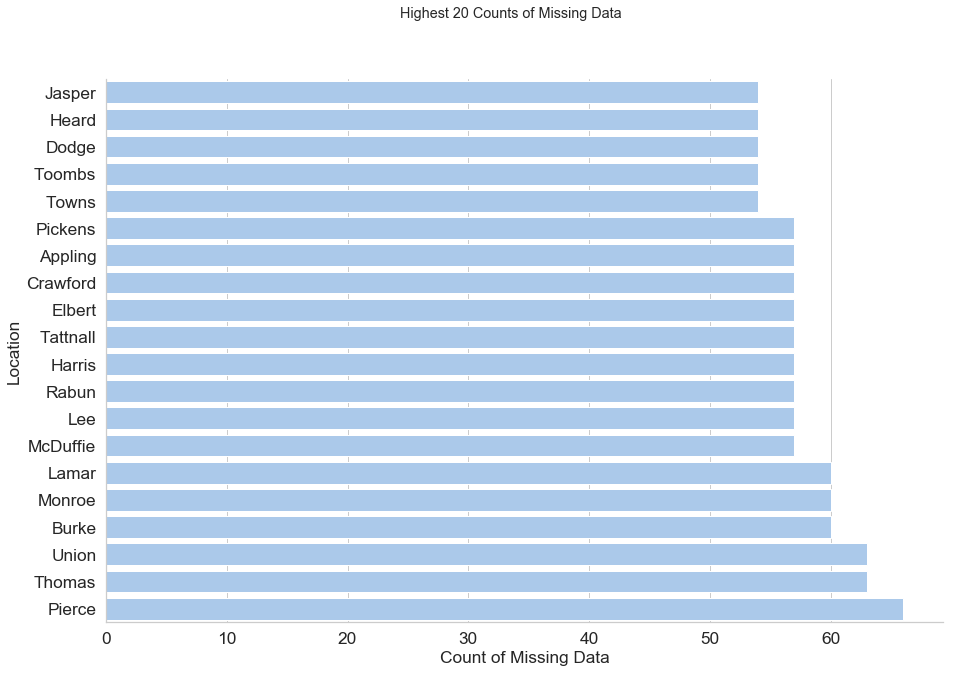

In [325]:
temp_df = df.T.sort_values('count_na').tail(20).loc[:,['count_na']]

locations = np.array(temp_df.T.columns)
na_counts = np.array(temp_df.count_na)
# na_counts

sns.set_style("whitegrid")
    
# bar 1  
ax = sns.set_color_codes("pastel")
#sns.barplot(x,y,color='b')
sns.barplot(x=na_counts, y=locations,color="b")
# # bar 2     
# if len(labels) == 2:
#     # Plot the crashes where alcohol was involved
#     sns.set_color_codes("muted")
#     sns.barplot(x=xs[1], y=ys[1], data=df_cols,
#                 label=labels[1], color="b")
# # bar 3
# if len(labels) == 3:
#     # Plot the crashes where alcohol was involved
#     sns.set_color_codes("muted")
#     sns.barplot(x=xs[2], y=ys[2], data=df_cols,
#                 label=labels[2], color="r")

sns.despine()
plt.suptitle('Highest 20 Counts of Missing Data')
plt.ylabel('Location')
plt.xlabel('Count of Missing Data')

plt.show()    


### Deaths

Here the County_Summary is the sum

In [203]:
df.loc['Deaths']

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year,count_na,pct_rate_missing_data
Category,,,,,,,,,,,,,,,,,,,,,
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,161.0,0.981707
Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,161.0,0.981707


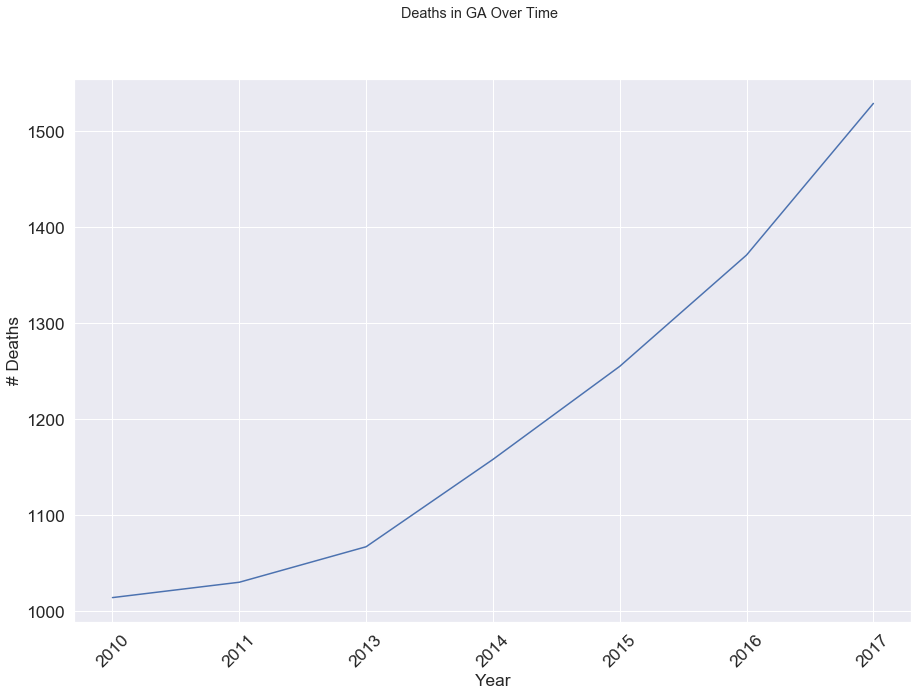

In [207]:
plot_chart(df.loc['Deaths'][['Georgia', 'Year']], 'Deaths in GA Over Time', '# Deaths', 'Year')

#### Avg Deaths by County from 1999 to 2017

In [232]:
sort_on = 'mean'
agg_df[agg_df['category'] == 'Deaths'].sort_values(sort_on).tail(20).loc[:,['location', sort_on]]

,location,mean
111,Bibb,14.857
139,Houston,15.571
123,Columbia,16.286
127,Douglas,19.143
110,Bartow,19.143
145,Muscogee,19.143
114,Carroll,22.286
119,Clayton,24.714
137,Hall,26.286
147,Paulding,26.429


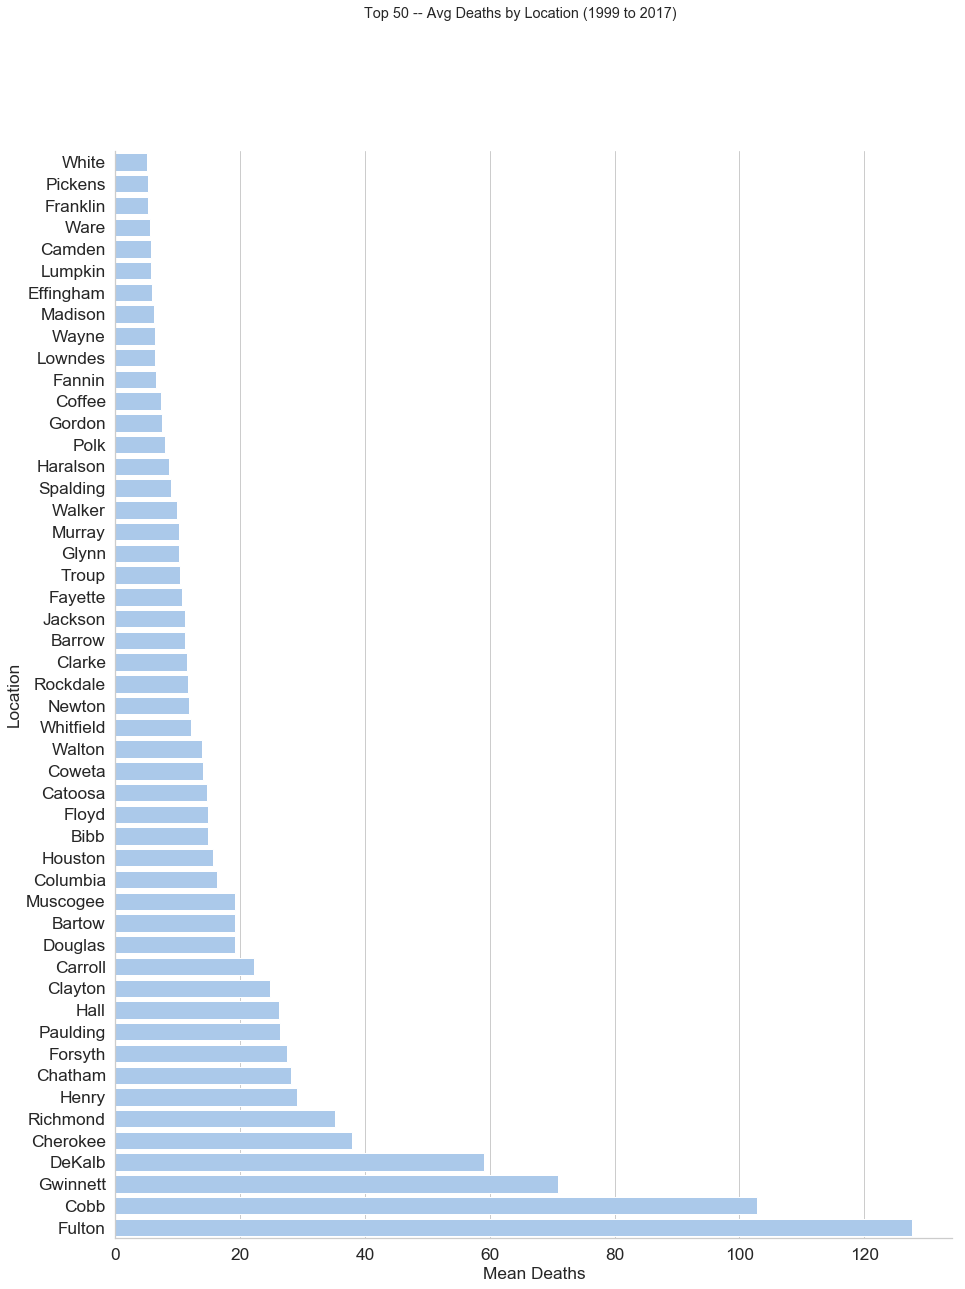

In [86]:
plot_agg_chart(agg_df[agg_df['category'] == 'Deaths']
               .sort_values('mean').tail(50)
               .loc[:,['location', 'mean']], 
               'Top 50 -- Avg Deaths by Location (1999 to 2017)', 'Mean Deaths', 'Location')

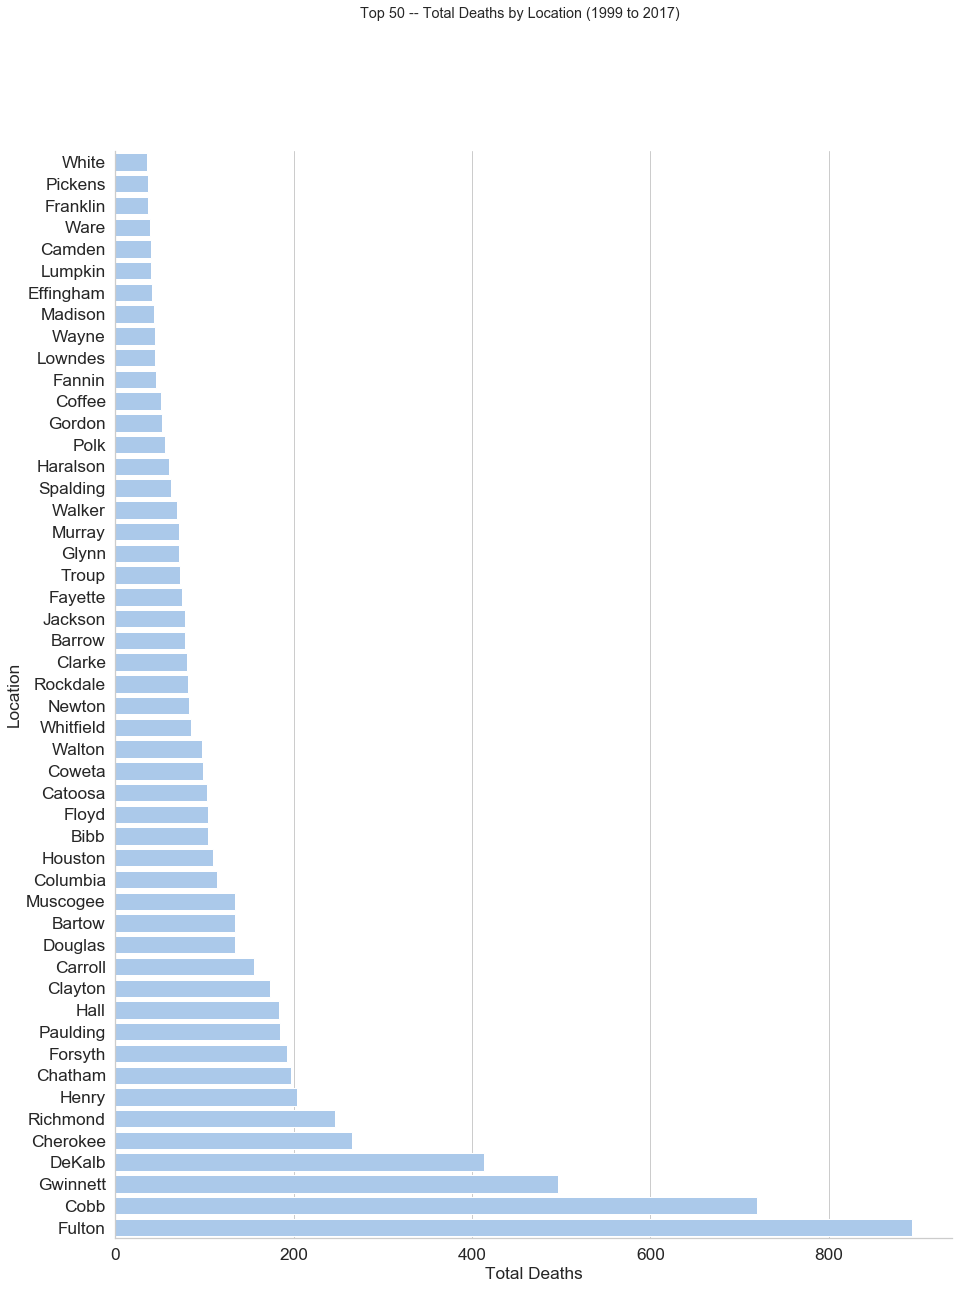

In [85]:
plot_agg_chart(agg_df[agg_df['category'] == 'Deaths']
               .sort_values('sum').tail(50)
               .loc[:,['location', 'sum']], 
               'Top 50 -- Total Deaths by Location (1999 to 2017)', 'Total Deaths', 'Location')

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year,count_na,pct_rate_missing_data
Category,,,,,,,,,,,,,,,,,,,,,
Death_Rate_Selected_Years_Total,9.200000,7.300000,10.400000,10.20000,NaN,13.500000,3.900000,4.40000,8.000000,16.900000,...,3.800000,9.500000,11.500000,11.500000,10.900000,9.200000,9.200000,NaN,13.0,0.079755
Age_Adjusted_Death_Rate_Selected_Years_Total,9.100000,7.500000,10.900000,10.80000,NaN,13.900000,3.700000,4.60000,8.800000,17.600000,...,3.900000,9.800000,12.200000,11.400000,11.200000,9.600000,9.100000,NaN,13.0,0.079755
Pct_Deathsby_Cause_Selected_Years_Total,1.200000,0.700000,1.200000,0.90000,NaN,1.600000,0.300000,0.40000,0.800000,1.800000,...,0.400000,1.000000,1.100000,1.400000,0.900000,1.200000,1.200000,NaN,13.0,0.079755
count_na,12.000000,57.000000,42.000000,45.00000,18.000000,51.000000,42.000000,45.00000,39.000000,48.000000,...,42.000000,36.000000,27.000000,18.000000,51.000000,30.000000,12.000000,4.00000,0.0,0.000000
pct_rate_missing_data,0.073171,0.347561,0.256098,0.27439,0.109756,0.310976,0.256098,0.27439,0.237805,0.292683,...,0.256098,0.219512,0.164634,0.109756,0.310976,0.182927,0.073171,0.02439,0.0,0.000000


### Death Rate

In [125]:
df.loc['Death_Rate']

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year,count_na,pct_rate_missing_data
Category,,,,,,,,,,,,,,,,,,,,,
Death_Rate,3.4,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,3.4,1999.0,59.0,0.359756
Death_Rate,4.7,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,4.7,2000.0,72.0,0.439024
Death_Rate,5.9,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,9.4,NaN,6.9,5.9,2001.0,68.0,0.414634
Death_Rate,6.5,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,10.6,NaN,8.0,6.5,2002.0,66.0,0.402439
Death_Rate,6.7,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,11.0,8.8,NaN,NaN,6.7,2003.0,72.0,0.439024
Death_Rate,7.4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,9.3,NaN,NaN,9.8,7.4,2004.0,69.0,0.420732
Death_Rate,7.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,20.0,6.8,NaN,NaN,7.0,2005.0,81.0,0.493902
Death_Rate,7.7,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,7.8,NaN,NaN,7.7,2006.0,71.0,0.432927
Death_Rate,8.8,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,9.2,11.9,9.9,0.0,NaN,8.8,2007.0,79.0,0.481707


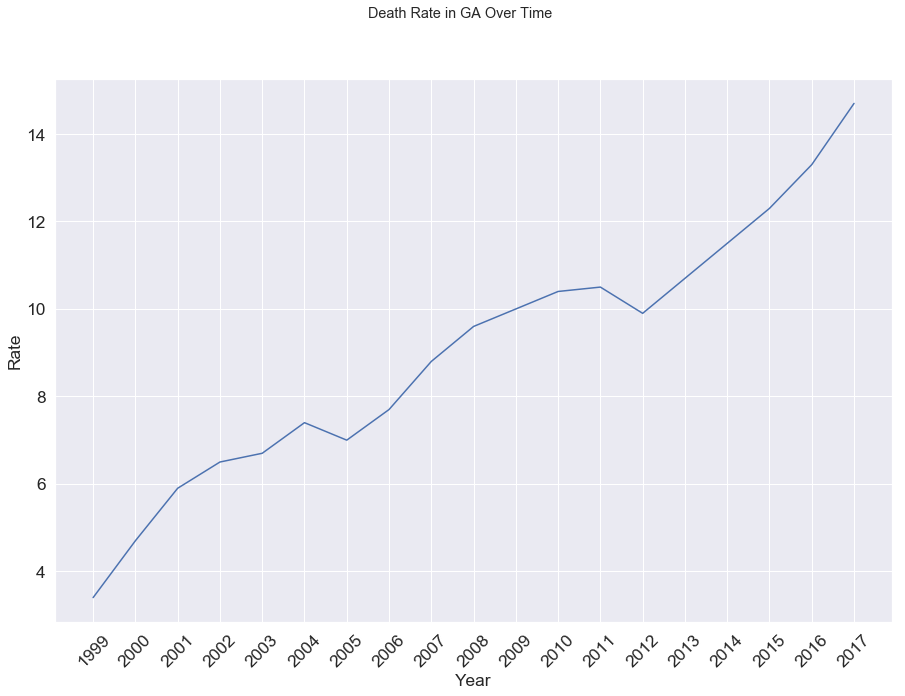

In [175]:
plot_chart(df.loc['Death_Rate'][['Georgia', 'Year']], 'Death Rate in GA Over Time', 'Rate', 'Year')

##### Highest Avg Death Rates by County from 1999 to 2017

In [29]:
# getting the 10 highest locations
ten_worst_avg_death_rates_loc = agg_df[agg_df['category'] == 'Death_Rate'].sort_values('mean').tail(20).loc[:,['location', 'mean']].tail(10)

In [178]:
agg_df[agg_df['category'] == 'Death_Rate'].sort_values('mean').tail(20).loc[:,['location', 'mean']]

,location,mean
171,Butts,17.557
307,Polk,17.736
273,Carroll,17.824
259,Wayne,18.000
299,Jackson,18.533
176,Chattooga,20.062
210,Lamar,20.100
193,Franklin,20.300
303,Murray,20.562
316,Ware,20.883


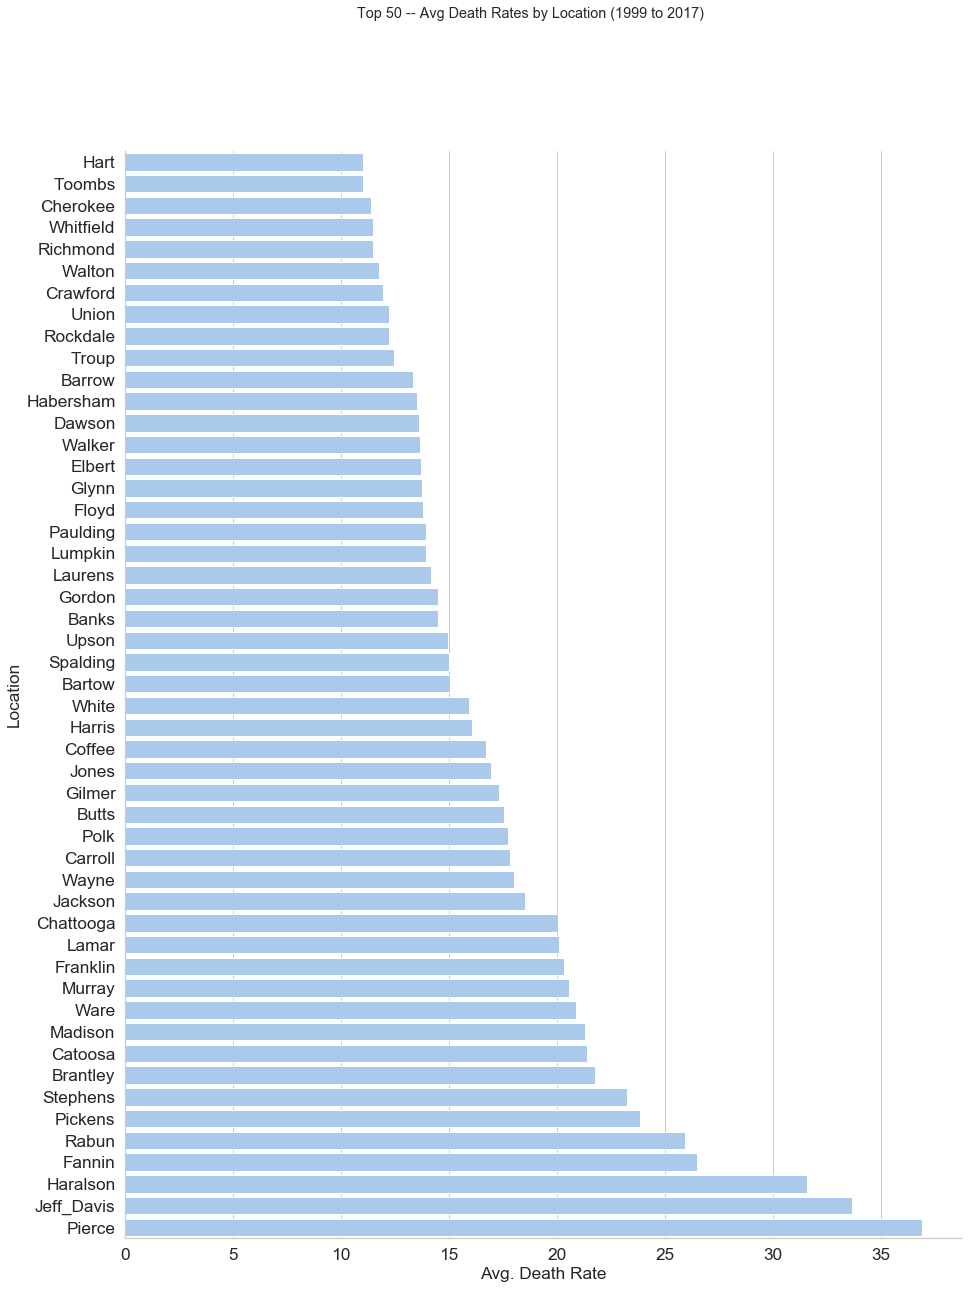

In [73]:
plot_agg_chart(agg_df[agg_df['category'] == 'Death_Rate']
               .sort_values('mean').tail(50)
               .loc[:,['location', 'mean']], 
               'Top 50 -- Avg Death Rates by Location (1999 to 2017)', 'Avg. Death Rate', 'Location')

## Age Adjusted Death Rate

In [32]:
df.loc['Age_Adjusted_Death_Rate']

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year
Category,,,,,,,,,,,,,,,,,,,,,
Age_Adjusted_Death_Rate,3.4,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.4,1999.0
Age_Adjusted_Death_Rate,4.6,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,4.6,2000.0
Age_Adjusted_Death_Rate,5.8,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,13.8,NaN,0.0,NaN,NaN,9.3,NaN,6.9,5.8,2001.0
Age_Adjusted_Death_Rate,6.5,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,10.2,NaN,8.2,6.5,2002.0
Age_Adjusted_Death_Rate,6.7,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,0.0,NaN,11.9,8.4,NaN,NaN,6.7,2003.0
Age_Adjusted_Death_Rate,7.3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,18.9,NaN,NaN,NaN,9.5,NaN,NaN,9.8,7.3,2004.0
Age_Adjusted_Death_Rate,6.9,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,21.7,6.9,NaN,NaN,6.9,2005.0
Age_Adjusted_Death_Rate,7.6,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,11.1,NaN,NaN,NaN,NaN,8.1,NaN,NaN,7.6,2006.0
Age_Adjusted_Death_Rate,8.6,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,13.6,NaN,0.0,10.0,12.8,10.0,0.0,NaN,8.6,2007.0


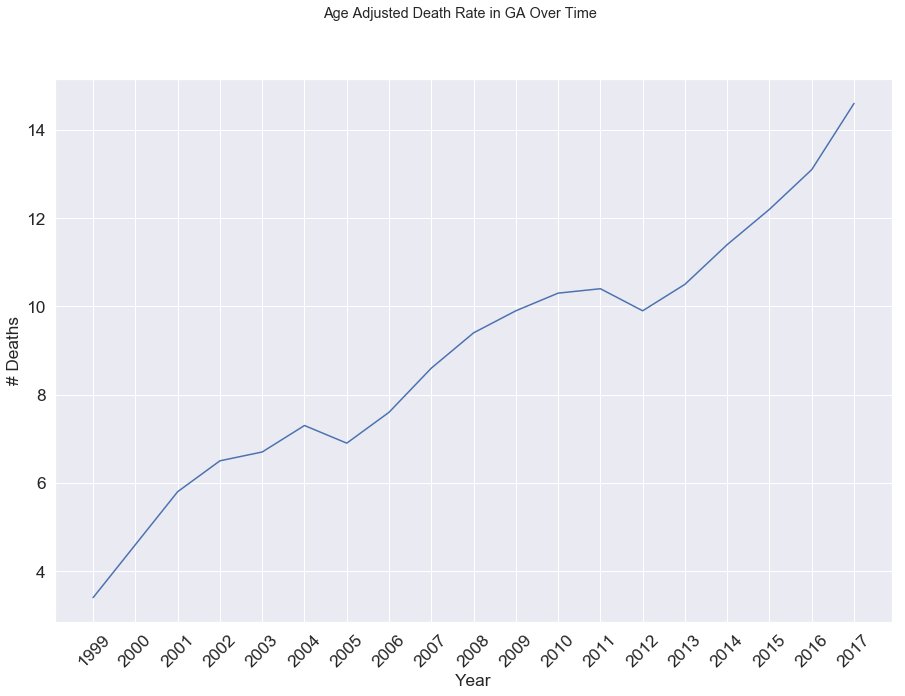

In [70]:
plot_chart(df.loc['Age_Adjusted_Death_Rate'][['Georgia', 'Year']], 'Age Adjusted Death Rate in GA Over Time', '# Deaths', 'Year')

##### Highest Avg Age Adjusted Death Rates by County from 1999 to 2017

In [34]:
agg_df[agg_df['category'] == 'Age_Adjusted_Death_Rate'].sort_values('mean').tail(20).loc[:,['location', 'mean']]

,location,mean
418,Wayne,18.136
432,Carroll,18.206
466,Polk,18.336
458,Jackson,18.393
335,Chattooga,19.338
353,Gilmer,19.471
369,Lamar,20.133
462,Murray,20.475
352,Franklin,20.737
475,Ware,21.183


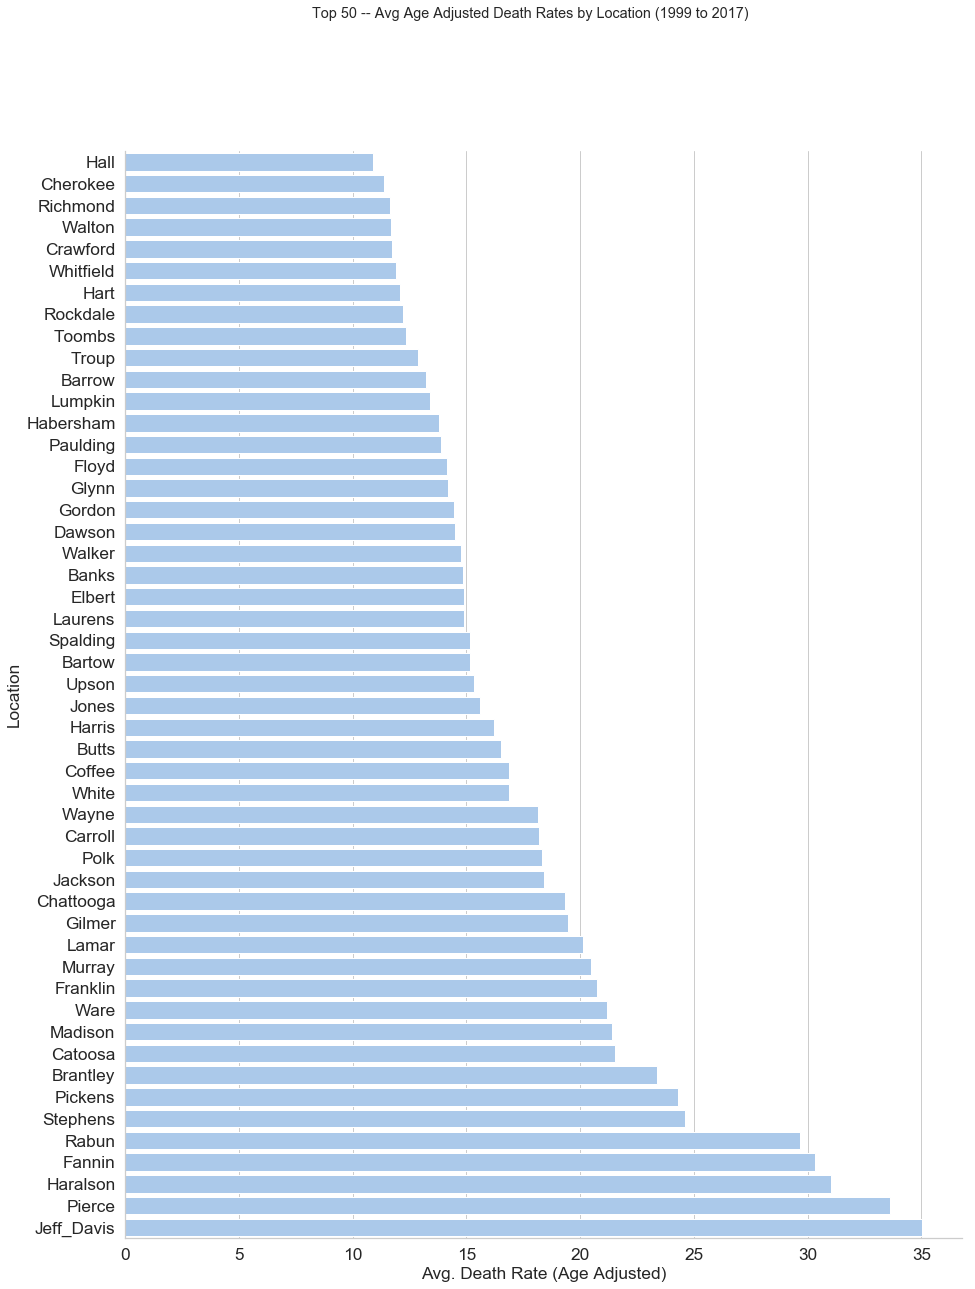

In [74]:
plot_agg_chart(agg_df[agg_df['category'] == 'Age_Adjusted_Death_Rate']
               .sort_values('mean').tail(50)
               .loc[:,['location', 'mean']], 
               'Top 50 -- Avg Age Adjusted Death Rates by Location (1999 to 2017)', 'Avg. Death Rate (Age Adjusted)', 'Location')

## Percent Deaths By Cause

In [36]:
df.loc['Pct_Deathsby_Cause']

,Georgia,Appling,Atkinson,Bacon,Baker,Banks,Ben_Hill,Berrien,Bleckley,Brantley,...,Spalding,Thomas,Tift,Troup,Walker,Walton,Ware,Whitfield,County_Summary,Year
Category,,,,,,,,,,,,,,,,,,,,,
Pct_Deathsby_Cause,0.4,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.4,1999.0
Pct_Deathsby_Cause,0.6,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.6,2000.0
Pct_Deathsby_Cause,0.8,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,1.3,NaN,0.0,NaN,NaN,1.2,NaN,0.9,0.8,2001.0
Pct_Deathsby_Cause,0.9,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,1.4,NaN,1.0,0.9,2002.0
Pct_Deathsby_Cause,0.9,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,0.0,NaN,1.0,1.1,NaN,NaN,0.9,2003.0
Pct_Deathsby_Cause,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,1.9,NaN,NaN,NaN,0.9,NaN,NaN,1.3,1.0,2004.0
Pct_Deathsby_Cause,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,1.9,0.8,NaN,NaN,1.0,2005.0
Pct_Deathsby_Cause,1.1,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,1.2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.1,2006.0
Pct_Deathsby_Cause,1.2,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,1.2,NaN,0.0,1.0,1.2,1.4,0.0,NaN,1.2,2007.0


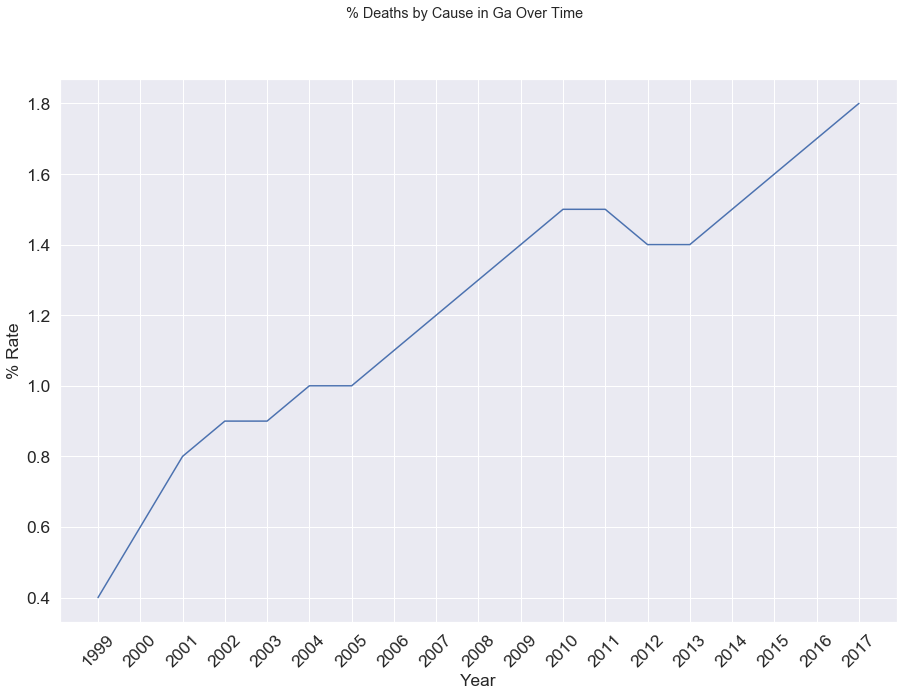

In [71]:
plot_chart(df.loc['Pct_Deathsby_Cause'][['Georgia', 'Year']], '% Deaths by Cause in Ga Over Time', '% Rate', 'Year')

##### Highest Avg % Deaths by Cause by County from 1999 to 2017

In [38]:
agg_df[agg_df['category'] == 'Pct_Deathsby_Cause'].sort_values('mean').tail(20).loc[:,['location', 'mean']]

,location,mean
586,Barrow,1.841
608,Forsyth,1.850
598,Coffee,1.850
527,Jones,1.867
587,Bartow,1.882
518,Harris,1.975
594,Cherokee,2.011
554,Rabun,2.025
485,Brantley,2.129
617,Jackson,2.133


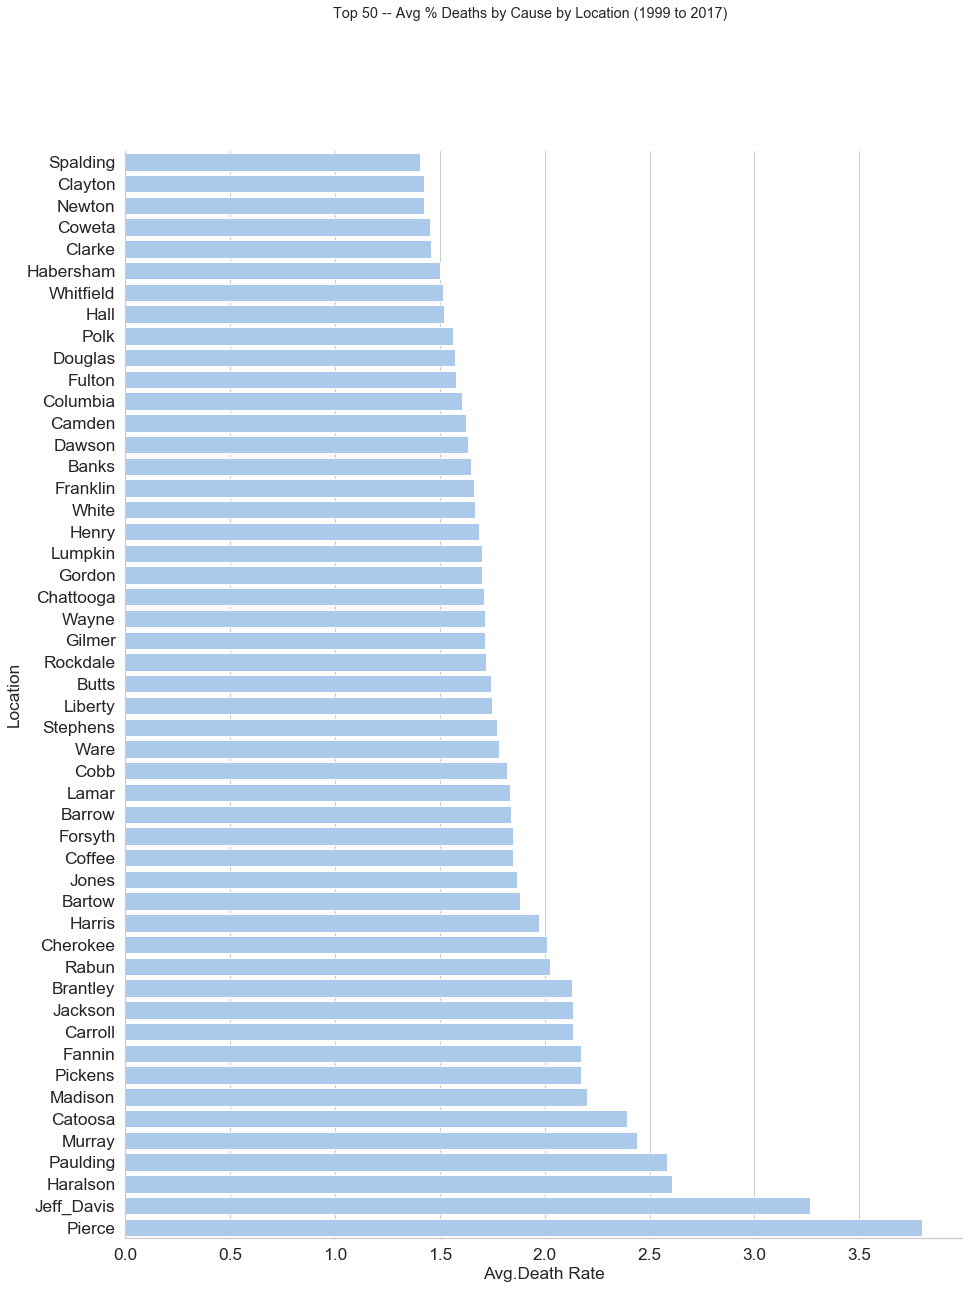

In [75]:
plot_agg_chart(agg_df[agg_df['category'] == 'Pct_Deathsby_Cause']
               .sort_values('mean').tail(50)
               .loc[:,['location', 'mean']], 
               'Top 50 -- Avg % Deaths by Cause by Location (1999 to 2017)', 'Avg.Death Rate', 'Location')

In [93]:
df.isna().sum()

Georgia           12
Appling           57
Atkinson          42
Bacon             45
Baker             18
Banks             51
Ben_Hill          42
Berrien           45
Bleckley          39
Brantley          48
Brooks            39
Bryan             48
Burke             60
Butts             48
Calhoun           24
Candler           39
Charlton          39
Chattahoochee     36
Chattooga         45
Clay              24
Clinch            36
Cook              48
Crawford          57
Crisp             48
Dade              39
Dawson            42
Decatur           48
Dodge             54
Dooly             33
Early             30
                  ..
Forsyth           15
Fulton            12
Glynn             30
Gordon            30
Gwinnett          12
Habersham         45
Hall              15
Henry             15
Houston           21
Jackson           24
Laurens           33
Liberty           45
Lowndes           33
Murray            21
Muscogee          15
Newton            24
Paulding     

## Poverty Data at the County Level from 2017
From the [USDA](https://data.ers.usda.gov/reports.aspx?ID=17826)

In [40]:
poverty_children_path = '..\Data\GaPovertyByCounty_Children_0-17_2017.csv'
poverty_all_path = '..\Data\GaPovertyByCounty_All_2017.csv'

pov_children = pd.read_csv(poverty_children_path).dropna()
pov_all = pd.read_csv(poverty_all_path).dropna()

In [41]:
pov_children.sort_values('Percent').tail(20)

,FIPS,Name,RUC Code,Percent,Lower Bound,Upper Bound
51,13107.0,Emanuel,7.0,39.4,30.4,48.4
151,13309.0,Wheeler,9.0,39.9,29.5,50.3
2,13007.0,Baker,3.0,40.0,29.6,50.4
17,13037.0,Calhoun,8.0,40.2,30.1,50.3
47,13099.0,Early,6.0,40.6,30.0,51.2
52,13109.0,Evans,6.0,41.3,32.0,50.6
45,13095.0,Dougherty,3.0,41.5,34.3,48.7
140,13287.0,Turner,6.0,42.0,31.7,52.3
1,13005.0,Bacon,7.0,42.7,35.0,50.4
132,13271.0,Telfair,7.0,42.8,33.4,52.2


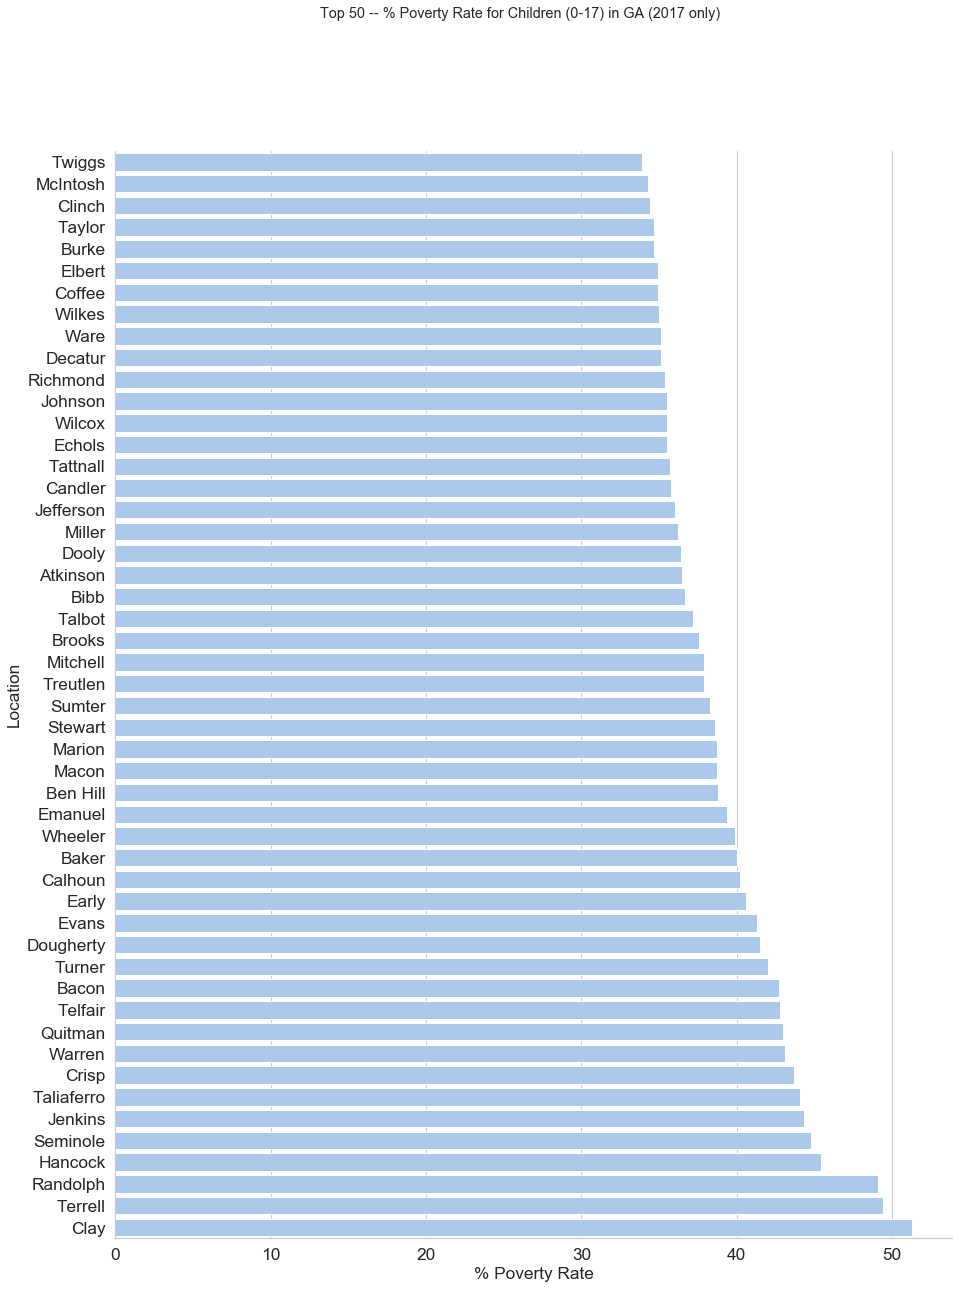

In [76]:
plot_agg_chart(pov_children
               .sort_values('Percent').tail(50)
               .loc[:,['Name', 'Percent']], 
               'Top 50 -- % Poverty Rate for Children (0-17) in GA (2017 only)', '% Poverty Rate', 'Location')

In [43]:
ten_worst_avg_death_rates_loc

,location,mean
219,Madison,21.273
274,Catoosa,21.367
167,Brantley,21.757
241,Stephens,23.250
230,Pickens,23.825
236,Rabun,25.925
192,Fannin,26.491
199,Haralson,31.567
205,Jeff_Davis,33.650
231,Pierce,36.900


In [44]:
# exctracting Percent from pov rate for children
pov_pct_child = pd.DataFrame(pov_children.set_index('Name').T.loc['Percent'])
pov_pct_child['Percent_Children'] = pov_pct_child['Percent']
pov_pct_child.drop(columns='Percent', inplace=True)

# exctracting Percent from pov rate for all
pov_pct_all = pd.DataFrame(pov_all.set_index('Name').T.loc['Percent'])
pov_pct_all['Percent_All'] = pov_pct_all['Percent']
pov_pct_all.drop(columns='Percent', inplace=True)

pov_percent = pd.concat([pov_pct_child.T, pov_pct_all.T])

# add percent poverty rates to main df
df_with_pov = pd.concat([df, pov_percent], sort=True)

In [45]:
df_with_pov.tail(10)

,Appling,Atkinson,Bacon,Baker,Baldwin,Banks,Barrow,Bartow,Ben Hill,Ben_Hill,...,Wayne,Webster,Wheeler,White,Whitfield,Wilcox,Wilkes,Wilkinson,Worth,Year
Deaths,1.0,4.0,1.0,0.0,4.0,5.0,17.0,25.0,NaN,2.0,...,5.0,0.0,0.0,2.0,16.0,0.0,2.0,1.0,1.0,2017.0
Death_Rate,NaN,NaN,NaN,0.0,NaN,26.8,21.5,23.8,NaN,NaN,...,16.8,0.0,0.0,NaN,15.3,0.0,NaN,NaN,NaN,2017.0
Age_Adjusted_Death_Rate,NaN,NaN,NaN,0.0,NaN,26.2,21.4,25.8,NaN,NaN,...,16.7,0.0,0.0,NaN,16.2,0.0,NaN,NaN,NaN,2017.0
Pct_Deathsby_Cause,NaN,NaN,NaN,0.0,NaN,2.7,2.6,2.9,NaN,NaN,...,1.4,0.0,0.0,NaN,1.9,0.0,NaN,NaN,NaN,2017.0
Deaths_Selected_Years_Total,25.0,16.0,21.0,1.0,48.0,44.0,154.0,253.0,NaN,13.0,...,87.0,3.0,7.0,63.0,170.0,8.0,12.0,16.0,23.0,NaN
Death_Rate_Selected_Years_Total,7.3,10.4,10.2,NaN,5.5,13.5,12.8,14.2,NaN,3.9,...,15.8,NaN,5.1,13.0,9.2,4.7,6.1,8.7,5.6,NaN
Age_Adjusted_Death_Rate_Selected_Years_Total,7.5,10.9,10.8,NaN,5.6,13.9,12.8,14.2,NaN,3.7,...,15.8,NaN,4.9,13.1,9.6,4.5,7.0,9.2,6.0,NaN
Pct_Deathsby_Cause_Selected_Years_Total,0.7,1.2,0.9,NaN,0.6,1.6,1.8,1.8,NaN,0.3,...,1.5,NaN,0.6,1.4,1.2,0.4,0.5,0.8,0.6,NaN
Percent_Children,NaN,36.5,42.7,40.0,32.5,19.4,15.7,19.3,38.8,NaN,...,30.1,30.1,39.9,20.6,24.1,35.5,35.0,31.7,32.5,NaN
Percent_All,NaN,24.2,28.2,24.6,25.2,13.5,12.0,13.2,24.5,NaN,...,20.2,20.0,37.4,13.3,16.5,30.7,22.8,23.5,21.6,NaN


#### Write DF with Poverty data to csv

In [88]:
df_with_pov.to_csv('../Data/opioid_data-from-1999_with_poverty_data-from-2017.csv')

In [46]:
pov_all.sort_values('Percent').tail(20)

,FIPS,Name,RUC Code,Percent,Lower Bound,Upper Bound
44,13093.0,Dooly,6.0,27.6,21.6,33.6
51,13107.0,Emanuel,7.0,27.6,22.4,32.8
147,13301.0,Warren,8.0,27.9,22.1,33.7
52,13109.0,Evans,6.0,28.0,22.8,33.2
1,13005.0,Bacon,7.0,28.2,23.6,32.8
45,13095.0,Dougherty,3.0,28.2,24.2,32.2
81,13167.0,Johnson,7.0,29.0,22.7,35.3
123,13253.0,Seminole,6.0,29.2,23.7,34.7
94,13193.0,Macon,6.0,29.6,22.5,36.7
38,13081.0,Crisp,6.0,29.7,23.7,35.7


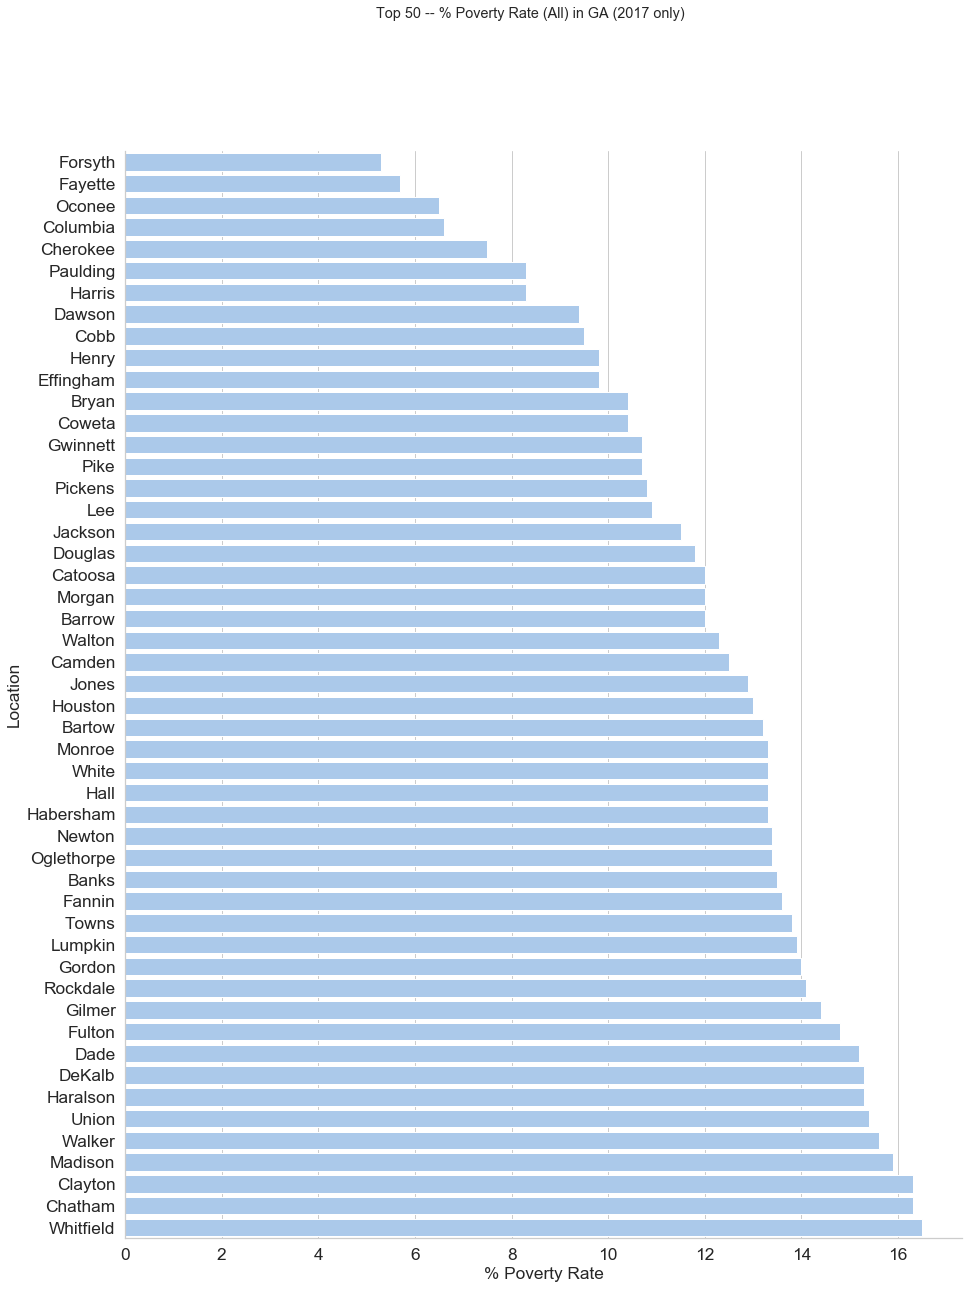

In [77]:
plot_agg_chart(pov_all
               .sort_values('Percent').head(50)
               .loc[:,['Name', 'Percent']], 
               'Top 50 -- % Poverty Rate (All) in GA (2017 only)', '% Poverty Rate', 'Location')

In [48]:
# new function to get agg df that includes poverty data
def get_totals2(df, categories):
    list_of_totals = []
    for cat in categories:
        for c in df.columns:
            if 'Year' not in c and 'County_Summary' not in c and 'Georgia' not in c:
                list_of_totals.append((cat, 
                                       c, 
                                       np.round(df.loc[cat][c].sum(), decimals=3), 
                                       np.round(df.loc[cat][c].mean(), decimals=3)))
    return list_of_totals

In [49]:
pov_categories = ['Deaths', 
                  'Death_Rate', 
                  'Age_Adjusted_Death_Rate', 
                  'Pct_Deathsby_Cause', 
                  'Percent_Children', 
                  'Percent_All'
]

# create separate df for aggregate data
agg_with_pov_data = np.array(get_totals2(df_with_pov, pov_categories))
agg_with_pov_df = pd.DataFrame(agg_with_pov_data, columns=['category', 'location', 'sum', 'mean'])

for c in agg_with_pov_df.columns:
    if 'category' != c and 'location' != c:
        agg_with_pov_df[c] = agg_with_pov_df[c].astype(float)

In [50]:
agg_with_pov_df.sort_values('category').head()

,category,location,sum,mean
482,Age_Adjusted_Death_Rate,Worth,32.3,3.230
379,Age_Adjusted_Death_Rate,Floyd,254.3,14.128
378,Age_Adjusted_Death_Rate,Fayette,135.6,9.040
377,Age_Adjusted_Death_Rate,Fannin,333.6,30.327
376,Age_Adjusted_Death_Rate,Evans,0.0,0.000


### Avg Age Adjusted Death Rate plotted with Poverty Data

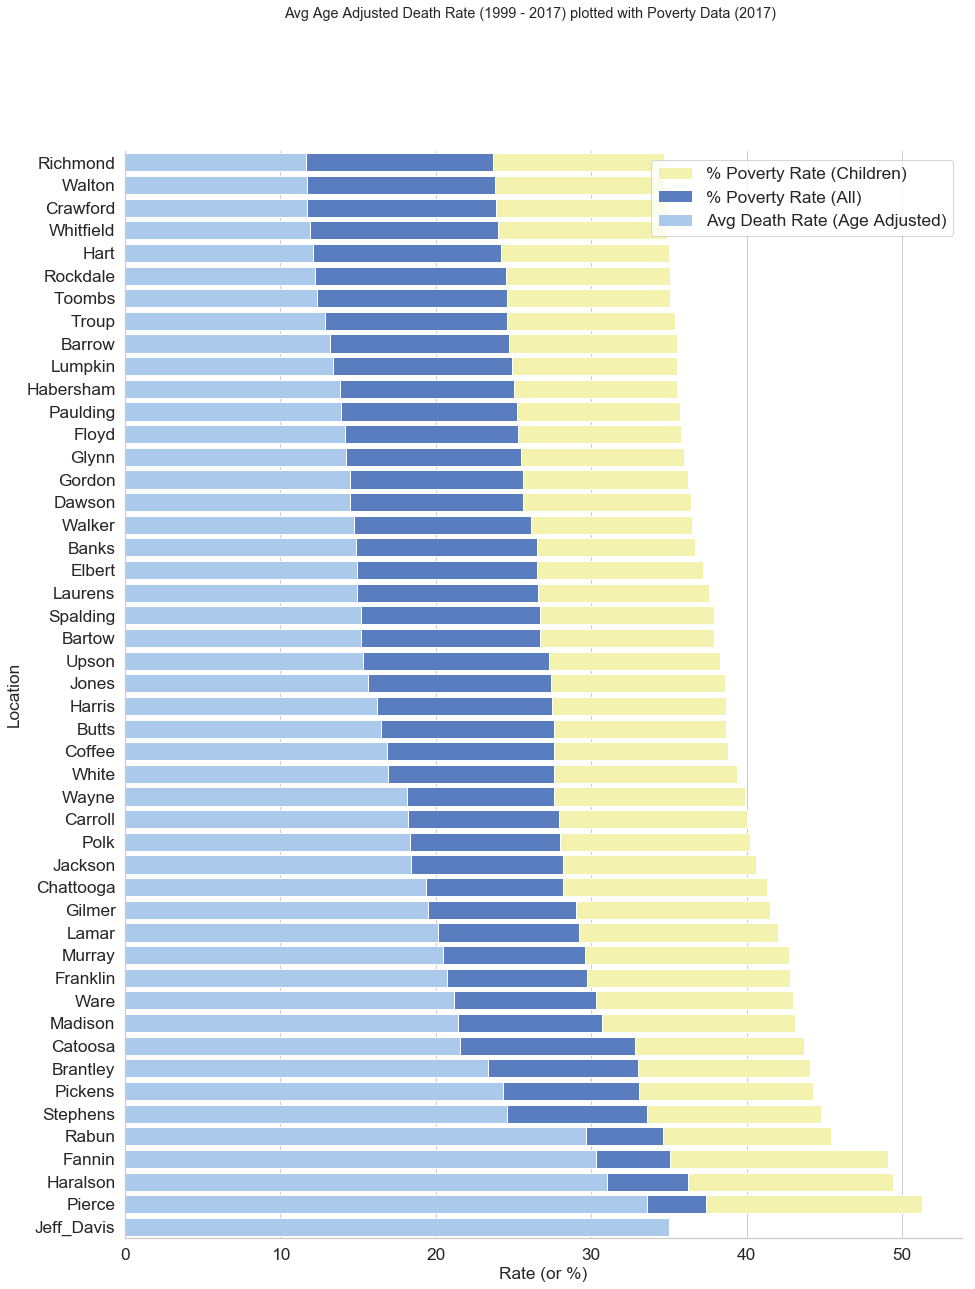

In [78]:
df_cols3 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_Children'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols3.dropna(how='any', inplace=True)

data3 = np.array(df_cols3)

xs3 = data3[:,1].astype(float)
ys3 = data3[:,0]

# bar 3
sns.set_color_codes("pastel")
sns.barplot(x=xs3, y=ys3, color="y", label='% Poverty Rate (Children)')

df_cols2 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_All'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols2.dropna(how='any', inplace=True)

data2 = np.array(df_cols2)

xs2 = data2[:,1].astype(float)
ys2 = data2[:,0]

# bar 2     
sns.set_color_codes("muted")
sns.barplot(x=xs2, y=ys2, color="b", label='% Poverty Rate (All)')

df_cols = agg_with_pov_df[agg_with_pov_df['category'] == 'Age_Adjusted_Death_Rate'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols.dropna(how='any', inplace=True)

data = np.array(df_cols)

xs1 = data[:,1].astype(float)
ys1 = data[:,0]

# # bar 1  
ax = sns.set_color_codes("pastel")
sns.barplot(x=xs1, y=ys1, color="b", label='Avg Death Rate (Age Adjusted)')

sns.despine()
plt.legend()
plt.suptitle('Avg Age Adjusted Death Rate (1999 - 2017) plotted with Poverty Data (2017)')
plt.ylabel('Location')
plt.xlabel('Rate (or %)')

plt.show()

### Avg Death Rate plotted with Poverty Data

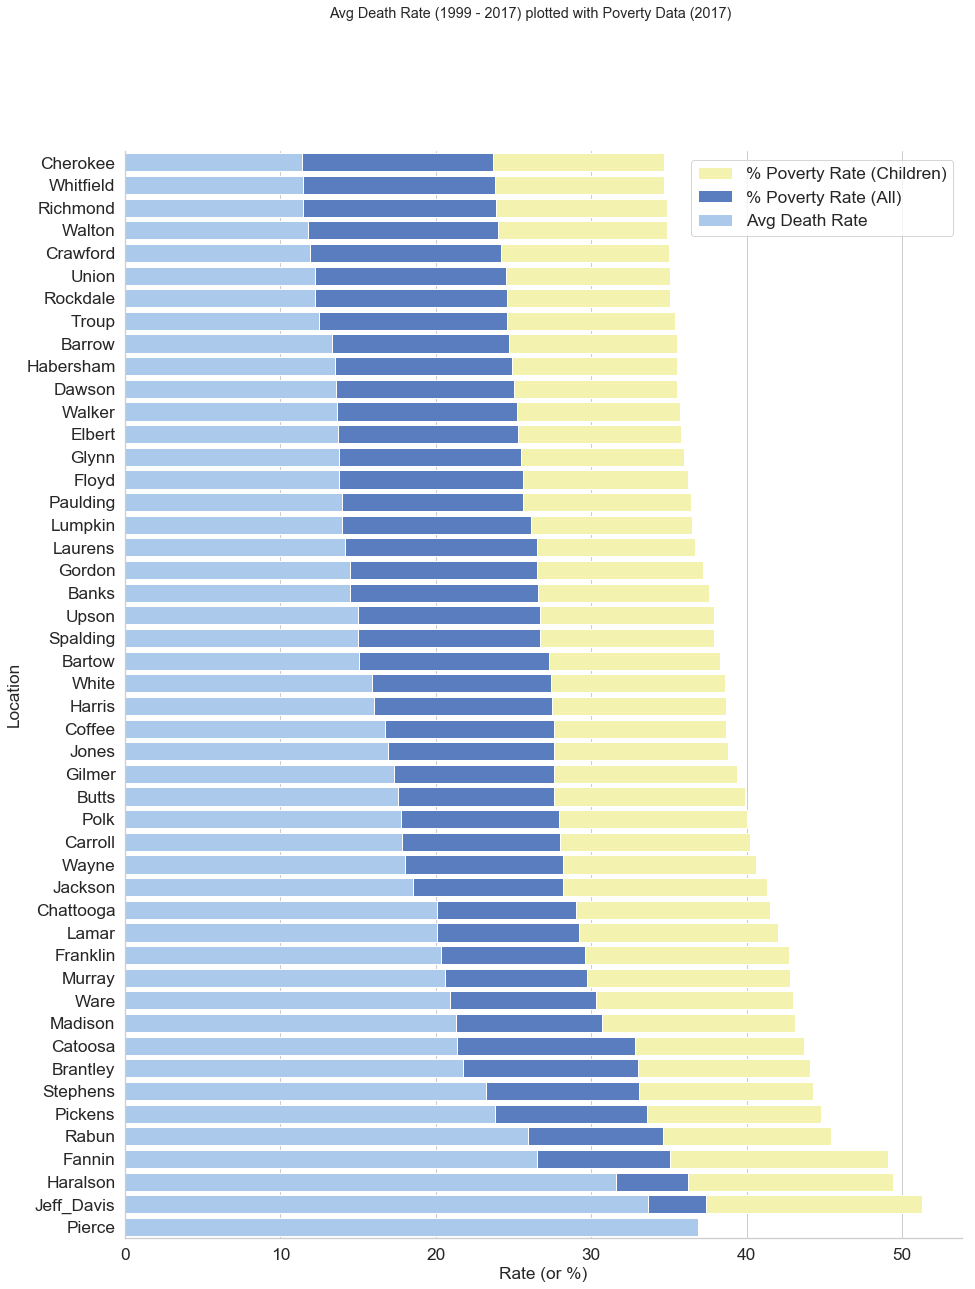

In [79]:
df_cols3 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_Children'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols3.dropna(how='any', inplace=True)

data3 = np.array(df_cols3)

xs3 = data3[:,1].astype(float)
ys3 = data3[:,0]

# bar 3
sns.set_color_codes("pastel")
sns.barplot(x=xs3, y=ys3, color="y", label='% Poverty Rate (Children)')

df_cols2 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_All'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols2.dropna(how='any', inplace=True)

data2 = np.array(df_cols2)

xs2 = data2[:,1].astype(float)
ys2 = data2[:,0]

# bar 2     
sns.set_color_codes("muted")
sns.barplot(x=xs2, y=ys2, color="b", label='% Poverty Rate (All)')

df_cols = agg_with_pov_df[agg_with_pov_df['category'] == 'Death_Rate'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols.dropna(how='any', inplace=True)

data = np.array(df_cols)

xs1 = data[:,1].astype(float)
ys1 = data[:,0]

# # bar 1  
ax = sns.set_color_codes("pastel")
sns.barplot(x=xs1, y=ys1, color="b", label='Avg Death Rate')

sns.despine()
plt.legend()
plt.suptitle('Avg Death Rate (1999 - 2017) plotted with Poverty Data (2017)')
plt.ylabel('Location')
plt.xlabel('Rate (or %)')

plt.show()

### Avg Deaths plotted with Poverty Data

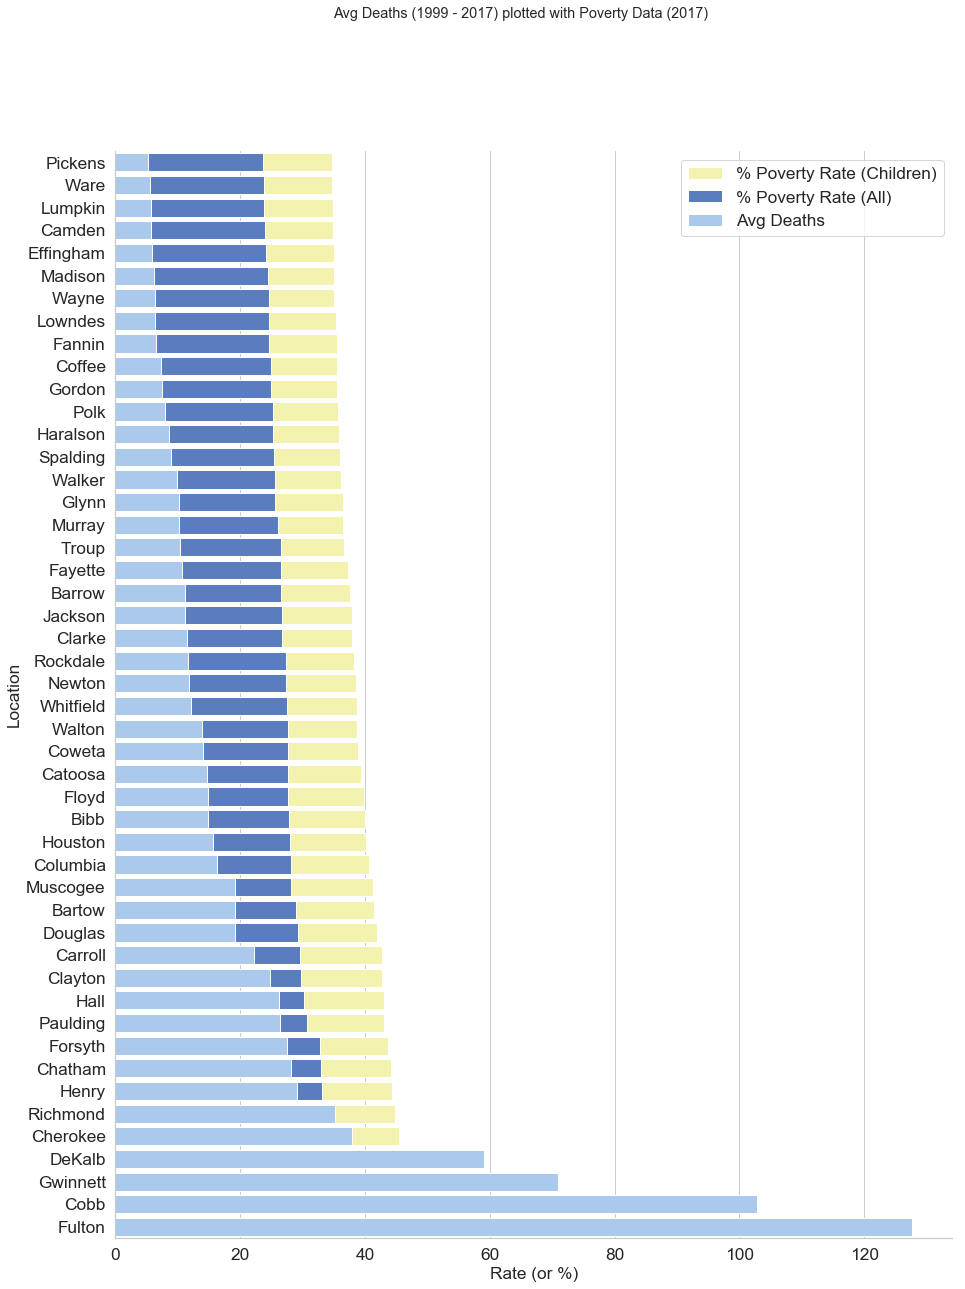

In [80]:
df_cols3 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_Children'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols3.dropna(how='any', inplace=True)

data3 = np.array(df_cols3)

xs3 = data3[:,1].astype(float)
ys3 = data3[:,0]

# bar 3
sns.set_color_codes("pastel")
sns.barplot(x=xs3, y=ys3, color="y", label='% Poverty Rate (Children)')

df_cols2 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_All'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols2.dropna(how='any', inplace=True)

data2 = np.array(df_cols2)

xs2 = data2[:,1].astype(float)
ys2 = data2[:,0]

# bar 2     
sns.set_color_codes("muted")
sns.barplot(x=xs2, y=ys2, color="b", label='% Poverty Rate (All)')

df_cols = agg_with_pov_df[agg_with_pov_df['category'] == 'Deaths'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols.dropna(how='any', inplace=True)

data = np.array(df_cols)

xs1 = data[:,1].astype(float)
ys1 = data[:,0]

# # bar 1  
ax = sns.set_color_codes("pastel")
sns.barplot(x=xs1, y=ys1, color="b", label='Avg Deaths')

sns.despine()
plt.legend()
plt.suptitle('Avg Deaths (1999 - 2017) plotted with Poverty Data (2017)')
plt.ylabel('Location')
plt.xlabel('Rate (or %)')

plt.show()

### Avg Percent Death Caused by Rate plotted with Poverty Data

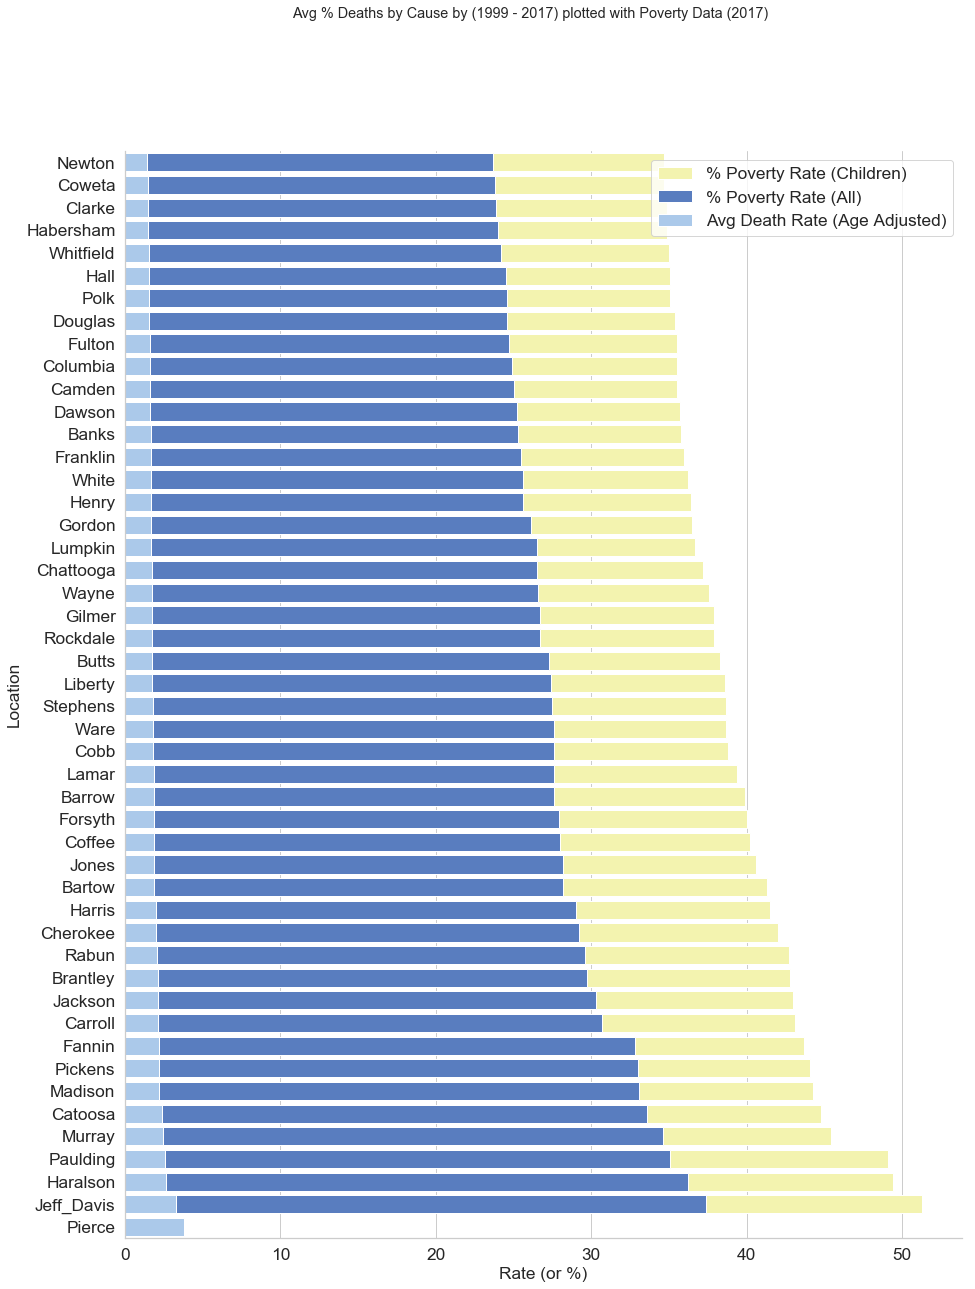

In [81]:
df_cols3 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_Children'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols3.dropna(how='any', inplace=True)

data3 = np.array(df_cols3)

xs3 = data3[:,1].astype(float)
ys3 = data3[:,0]

# bar 3
sns.set_color_codes("pastel")
sns.barplot(x=xs3, y=ys3, color="y", label='% Poverty Rate (Children)')

df_cols2 = agg_with_pov_df[agg_with_pov_df['category'] == 'Percent_All'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols2.dropna(how='any', inplace=True)

data2 = np.array(df_cols2)

xs2 = data2[:,1].astype(float)
ys2 = data2[:,0]

# bar 2     
sns.set_color_codes("muted")
sns.barplot(x=xs2, y=ys2, color="b", label='% Poverty Rate (All)')

df_cols = agg_with_pov_df[agg_with_pov_df['category'] == 'Pct_Deathsby_Cause'].sort_values('mean').loc[:,['location', 'mean']].tail(50)
df_cols.dropna(how='any', inplace=True)

data = np.array(df_cols)

xs1 = data[:,1].astype(float)
ys1 = data[:,0]

# # bar 1  
ax = sns.set_color_codes("pastel")
sns.barplot(x=xs1, y=ys1, color="b", label='Avg Death Rate (Age Adjusted)')

sns.despine()
plt.legend()
plt.suptitle('Avg % Deaths by Cause by (1999 - 2017) plotted with Poverty Data (2017)')
plt.ylabel('Location')
plt.xlabel('Rate (or %)')

plt.show()

In [83]:
agg_with_pov_df

,category,location,sum,mean
0,Deaths,Appling,14.0,2.000
1,Deaths,Atkinson,9.0,1.286
2,Deaths,Bacon,10.0,1.429
3,Deaths,Baker,1.0,0.143
4,Deaths,Baldwin,17.0,2.429
5,Deaths,Banks,20.0,2.857
6,Deaths,Barrow,78.0,11.143
7,Deaths,Bartow,134.0,19.143
8,Deaths,Ben Hill,0.0,NaN
9,Deaths,Ben_Hill,9.0,1.286
